## Titanic Disaster Survival Using Logistic Regression

### Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Data

In [15]:
titanic_data = pd.read_csv("train.csv")

In [16]:
len(titanic_data)

891

### View the data using head function which returns top rows

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explaining Dataset

1. Survival: 0 = No, 1 = Yes
2. Pclass: Ticket Class 1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex: Gender
4. Age: Age in Years
5. SibSp: Number of Siblings / spouses abroad the Titanic
6. Parch: Number of Parents / children abroad the Titanic
7. Ticket: Ticket Number
8. Fare: Passenger Fare
9. Cabin: Cabin Number
10. Embarked: Port of Embarkation C = Cherboug, Q = Queenstown, S = Southampton

In [18]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data Analysis

### Import Seaborn for visually Analysing the data

### Countplot of survived vs not survived

<Axes: xlabel='Survived', ylabel='count'>

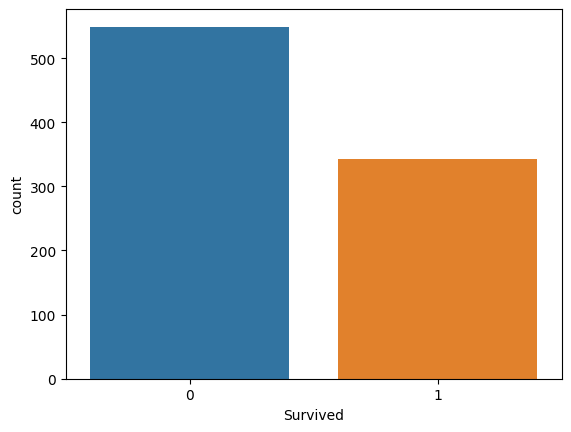

In [22]:
sns.countplot(x = "Survived", data = titanic_data)

### Male vs Female Survival

<Axes: xlabel='Survived', ylabel='count'>

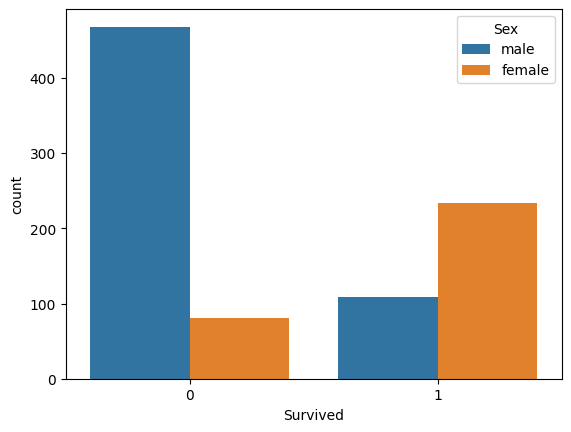

In [23]:
sns.countplot(x = "Survived", data = titanic_data, hue = "Sex")

#### As we can see through histogram the women survival rate is much higher than men survival rate 


  Histograms for the numerical columns: 



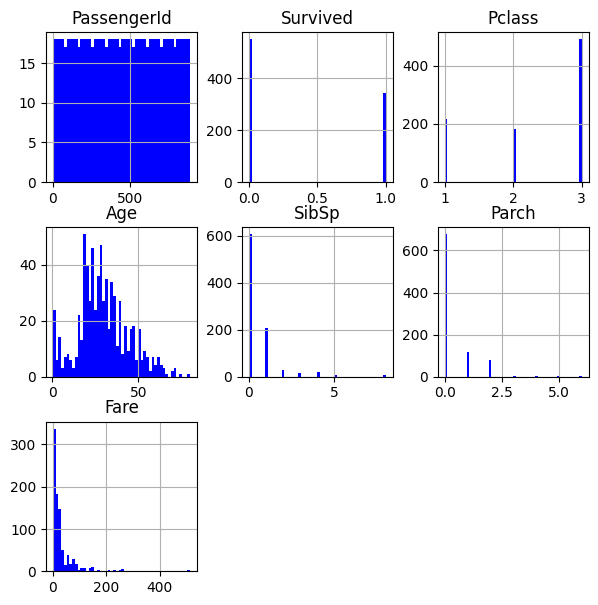

In [24]:
print("\n" +'\033[1m','\033[94m',"Histograms for the numerical columns:", '\033[0m' + "\n")
titanic_data.hist(bins= 50, figsize=(7,7),color= "Blue")
plt.show()  


  Boxplots for the numerical columns: 



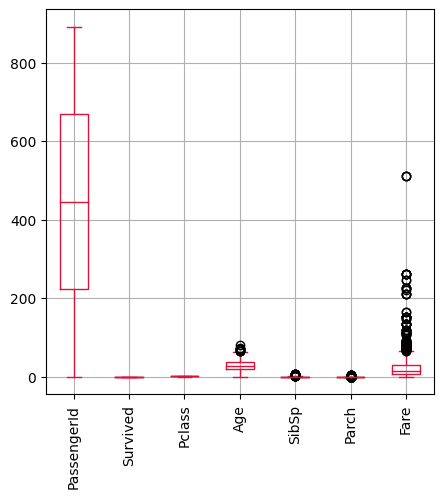

In [25]:
print("\n" +'\033[1m','\033[94m',"Boxplots for the numerical columns:", '\033[0m' + "\n")
titanic_data.boxplot(figsize=(5,5), rot=90, color= "Crimson")
plt.show()

In [26]:
print("\n" +'\033[1m','\033[94m', "Standard Correlation Coefficient of the numerical columns:", '\033[0m' + "\n")
print(titanic_data.corr(numeric_only = True))


  Standard Correlation Coefficient of the numerical columns: 

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  



  Correlation matrix for the numerical columns: 



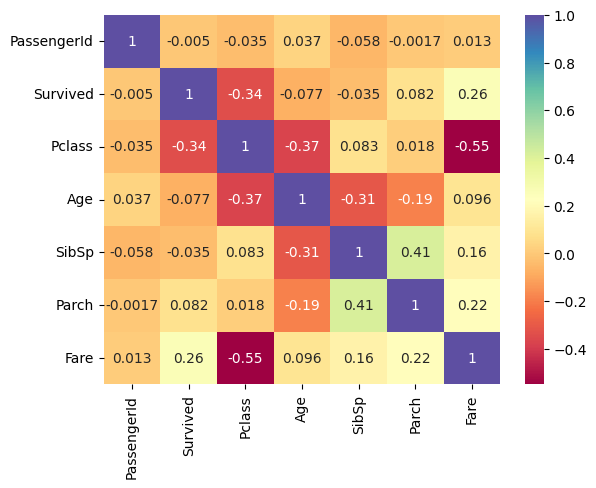

In [27]:
print("\n" +'\033[1m','\033[94m', "Correlation matrix for the numerical columns:", '\033[0m' + "\n")
corr = titanic_data.corr(numeric_only = True)
sns.heatmap(corr, annot = True, cmap="Spectral")
plt.show()

#### As we can see from the heatmap the survival rate is strongly Correlated with the travelling class of the passenger

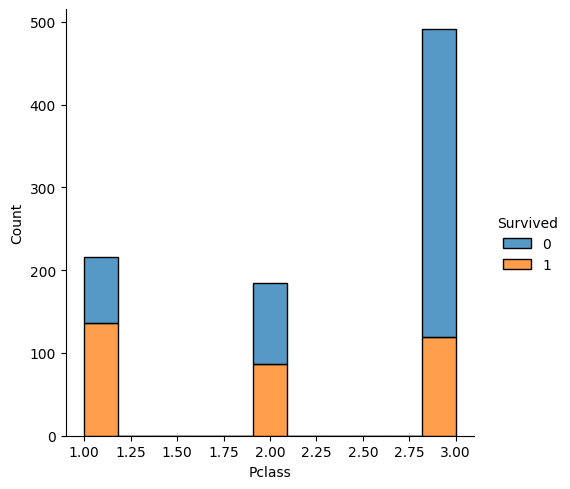

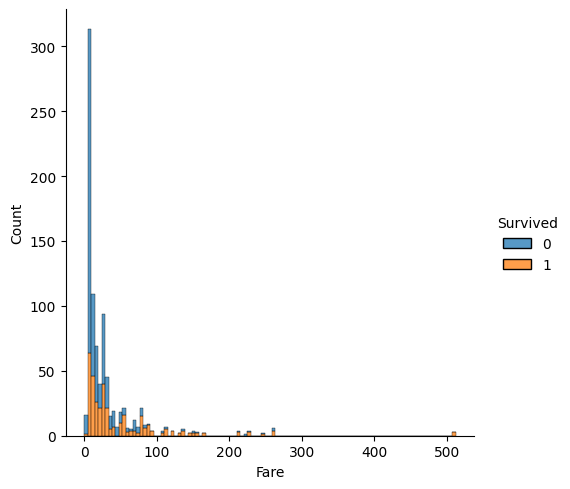

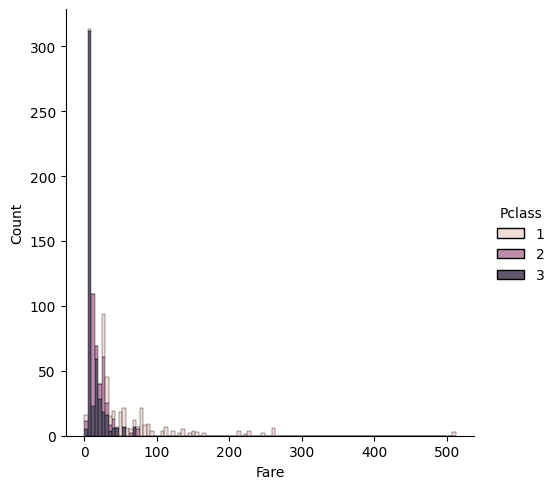

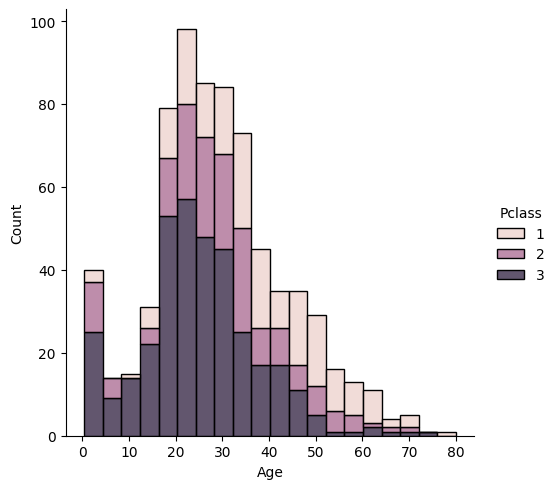

In [28]:
#Histograms of the features with the highest correlations with the target variable (i.e. "Survived")

sns.displot(titanic_data, x="Pclass", hue="Survived", multiple="stack",stat = "count")
sns.displot(titanic_data, x="Fare", hue="Survived", multiple="stack", stat = "count")

#Histograms of the features with the highest correlations with the feature (i.e. "Pclass")

sns.displot(titanic_data, x="Fare", hue="Pclass", multiple="stack", stat = "count")
sns.displot(titanic_data, x="Age", hue="Pclass", multiple="stack", stat = "count")

In [29]:
# Check for null

In [30]:
titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# Visualize null values

<Axes: >

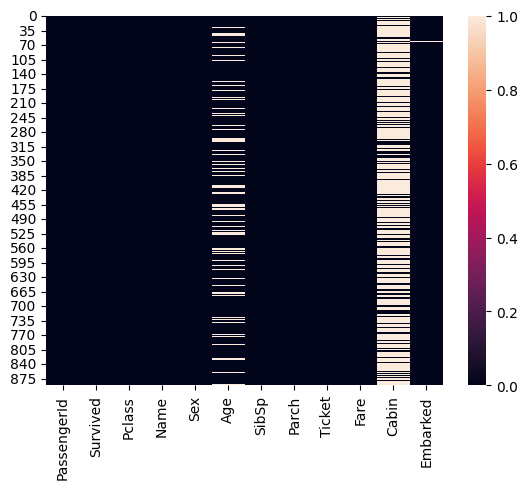

In [33]:
sns.heatmap(titanic_data.isna())

In [34]:
# Find the % of null values in age column

In [35]:
(titanic_data["Age"].isna().sum() / len(titanic_data["Age"])) * 100

19.865319865319865

In [36]:
# Find the % of null values in cabin column

In [37]:
(titanic_data["Cabin"].isna().sum() / len(titanic_data["Cabin"])) * 100

77.10437710437711

In [38]:
# Find the distribution for the age column

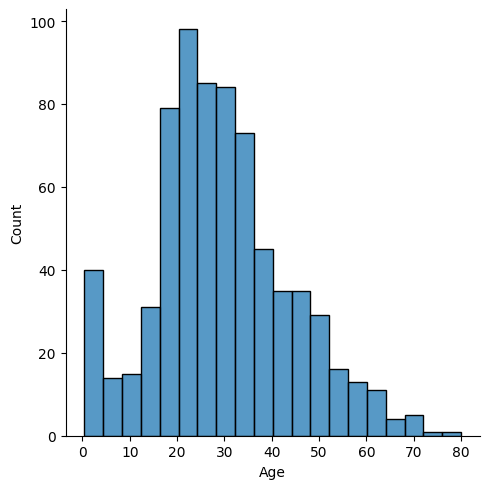

In [39]:
sns.displot(x = "Age", data = titanic_data)

## Data Cleaning

In [40]:
# Fill age column

In [41]:
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace = True)

In [42]:
# Verify the null Value

In [43]:
titanic_data["Age"].isna().sum()

0

In [44]:
# Drop cabin column

In [45]:
titanic_data.drop("Cabin", axis = 1, inplace = True)

In [46]:
# See the contents of the data

In [47]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
# Check for the non-numeric column

In [49]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [50]:
# Converting sex column to numerical values

In [51]:
gender = pd.get_dummies(titanic_data["Sex"], drop_first = True)

In [52]:
titanic_data["Gender"] = gender

In [53]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [54]:
# Drop the columns which are not required

In [55]:
titanic_data.drop(["Name","Sex","Ticket","Embarked"], axis = 1, inplace = True)

In [56]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,True
1,2,1,1,38.0,1,0,71.2833,False
2,3,1,3,26.0,0,0,7.9250,False
3,4,1,1,35.0,1,0,53.1000,False
4,5,0,3,35.0,0,0,8.0500,True


In [57]:
# Separate Dependent and independent variables

In [58]:
x = titanic_data[["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare", "Gender"]]
y = titanic_data["Survived"]

In [59]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,True
1,2,1,38.000000,1,0,71.2833,False
2,3,3,26.000000,0,0,7.9250,False
3,4,1,35.000000,1,0,53.1000,False
4,5,3,35.000000,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,True
887,888,1,19.000000,0,0,30.0000,False
888,889,3,29.699118,1,2,23.4500,False
889,890,1,26.000000,0,0,30.0000,True


In [60]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Data Modelling

### Building Model using Logistic Regression

In [61]:
# import train test split method

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# train test split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [65]:
# import Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
# Fit Logistic Regression

In [68]:
logisticRegression = LogisticRegression()

In [69]:
logisticRegression.fit(X_train, Y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
# Predict

In [71]:
predict = logisticRegression.predict(X_test)

## Testing

In [72]:
# Print Confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
pd.DataFrame(confusion_matrix(Y_test, predict), columns = ["Predicted No", "Predicted Yes"], index = ["Actual No", "Actual Yes"])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,37,83


In [75]:
# import Classification Report

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

